# Dataset used : No-Show appointments

## First of all let's explore the data to check if there is any missing or unlogic values and to get familiar with it

In [45]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [46]:
data = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [47]:
print(data.head())

      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

In [48]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None


In [49]:
print(data.describe())

          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       

In [50]:
print(data.columns)

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')


In [51]:
data["Age"].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [52]:
data['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [53]:
print(data.groupby('No-show')['Alcoholism'].sum())

No-show
No     2683
Yes     677
Name: Alcoholism, dtype: int64


In [54]:
print(data.groupby('No-show')['SMS_received'].sum())

No-show
No     25698
Yes     9784
Name: SMS_received, dtype: int64


# Assessing Data

#### 1- Unimportant columns are existed like patientID & appointment ID

#### 2- ScheduledDay and appoinmenday columns datatypes are inappropiate

#### 3- Inappropiate values are existed in the Handcap column

#### 4-Some age values aren't logic

#### 5-The days which the patient had to wait can be calculated through out the ScheduledDay and appoinmenday columns

# Cleaning Data

## 1.1 - define

#### Delete patientID & appointment ID Columns

## 1.2 - Code 

In [55]:
data.drop(columns=['PatientId','AppointmentID'],inplace=True)

## 1.3 - Test 

In [56]:
print(data.columns)
print(data.shape)

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show'],
      dtype='object')
(110527, 12)


## 2.1 - define

#### Converting ScheduledDay and appoinmenday column types into dateTime

## 2.2 - Code 

In [57]:
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])

## 2.3 - Test 

In [58]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110527 non-null  object             
 1   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 3   Age             110527 non-null  int64              
 4   Neighbourhood   110527 non-null  object             
 5   Scholarship     110527 non-null  int64              
 6   Hipertension    110527 non-null  int64              
 7   Diabetes        110527 non-null  int64              
 8   Alcoholism      110527 non-null  int64              
 9   Handcap         110527 non-null  int64              
 10  SMS_received    110527 non-null  int64              
 11  No-show         110527 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usage: 10.1+ MB
No

## 3.1 - define

#### Replacing the un valid values which are (2,3,4) with 1 because it makes more sense

## 3.2 - Code 

In [59]:
un_valid_values = [2,3,4] 
for i in un_valid_values :
    data['Handcap'].replace(i,1,inplace=True)

## 3.3 - Test 

In [60]:
data['Handcap'].value_counts()

0    108286
1      2241
Name: Handcap, dtype: int64

## 4.1 - define

#### Replacing Ages higher than 100 with mean value, And doing the same with values like 0 and lower than it

## 4.2 - Code 

In [61]:
data['Age'].replace([-1,0,102,115],int(data['Age'].mean()),inplace=True)

## 4.3 - Test

In [62]:
data['Age'].describe()

count    110527.000000
mean         38.269228
std          22.097034
min           1.000000
25%          20.000000
50%          37.000000
75%          55.000000
max         100.000000
Name: Age, dtype: float64

## 5.1 - define

### Calculating no of days the patient had to wait by subtracting the ScheduledDay column from the AppointmentDay column and then dropping the two columns

## 5.2 - Code

In [63]:
data['difference_in_days']=(data['AppointmentDay'].dt.date).sub(data['ScheduledDay'].dt.date,axis=0).dt.days
data.drop(columns=['ScheduledDay','AppointmentDay'],inplace=True)

## 5.3 - Test

In [64]:
data.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,difference_in_days
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


In [65]:
data['difference_in_days'].describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: difference_in_days, dtype: float64

In [66]:
set(data['difference_in_days'])

{-6,
 -1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 101,
 102,
 103,
 104,
 105,
 107,
 108,
 109,
 110,
 111,
 112,
 115,
 117,
 119,
 122,
 123,
 125,
 126,
 127,
 132,
 133,
 139,
 142,
 146,
 151,
 155,
 162,
 169,
 176,
 179}

### There must be some error happened caused the -1,-6 value to exist so i'm gonna drop them

In [67]:
dropped_data=data[(data['difference_in_days'] == -6) | (data['difference_in_days'] == -1)]

In [68]:
data.drop(dropped_data.index ,inplace=True)

In [69]:
data['difference_in_days'].describe()

count    110522.000000
mean         10.184253
std          15.255115
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: difference_in_days, dtype: float64

### Now i'm going to take a quick look again to make sure that the data is ready to be used in analysis

In [70]:
data.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,difference_in_days
count,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000
mean,38.269449,0.098270,0.197255,0.071868,0.030401,0.020258,0.321040,10.184253
std,22.096830,0.297681,0.397928,0.258270,0.171689,0.140884,0.466878,15.255115
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110522 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Gender              110522 non-null  object
 1   Age                 110522 non-null  int64 
 2   Neighbourhood       110522 non-null  object
 3   Scholarship         110522 non-null  int64 
 4   Hipertension        110522 non-null  int64 
 5   Diabetes            110522 non-null  int64 
 6   Alcoholism          110522 non-null  int64 
 7   Handcap             110522 non-null  int64 
 8   SMS_received        110522 non-null  int64 
 9   No-show             110522 non-null  object
 10  difference_in_days  110522 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 10.1+ MB


### Now, Data is ready for the analysis

In [72]:
data.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,difference_in_days
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


## Questions 

#### 1-What is the percent of the people that didn't show up to their appointments ? 

#### 2-What is the influence of the SMS_received on the patient's showing up situation ?

#### 3-Is the period between the ScheduledDay & the appoinmentDay has any thing to do with their showing up or not ?

#### 4-Does the patient's Scholarship affected on their showing up situation ?

#### 5-Do the patients didn't show up because they had handcaps   ?

# <font color=red>1-</font>

## <font color=red>I'll start with the first question to know the percent of the showing up </font>

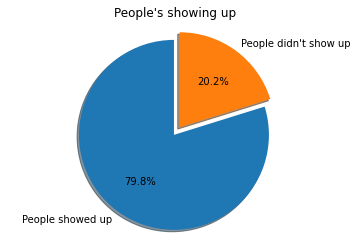

In [73]:
showed_up_percent = (data[data['No-show']=="No"]['No-show'].count() / data['No-show'].count() )*100
didnot_show_up_percent = (data[data['No-show']=="Yes"]['No-show'].count() / data['No-show'].count() ) * 100
labels = "People showed up", "People didn't show up" 
sizes = [showed_up_percent,didnot_show_up_percent]
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("People's showing up")
plt.show()

### 79.8% of people showed up to their appointment

# <font color=red>2-</font>

## <font color=red>Firstly let's see the effect of recieving on getting to the appointment</font>

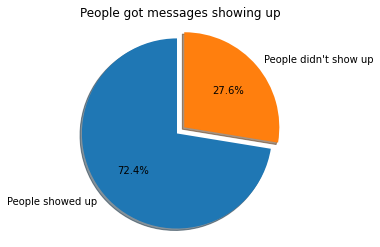

In [74]:
ppl_got_msg_related_data=data.groupby('No-show')['SMS_received'].sum().reset_index()
ppl_got_msg_and_showedup = (ppl_got_msg_related_data.at[0,'SMS_received'] / ppl_got_msg_related_data['SMS_received'].sum())*100
ppl_got_msg_and_didnot_showup = (ppl_got_msg_related_data.at[1,'SMS_received'] / ppl_got_msg_related_data['SMS_received'].sum())*100
labels = ["People showed up", "People didn't show up"]
sizes = [ppl_got_msg_and_showedup , ppl_got_msg_and_didnot_showup]
fig2,ax2 = plt.subplots()
ax2.pie(sizes,explode=(0,.1), labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')
plt.title("People got messages showing up")
plt.show()

### It looks that 72.4% of the people that got the message showed up to their meeting but to make sure of the importance of recieving the message let's see what percent of the people that didn't get the message showed up to their appointments 

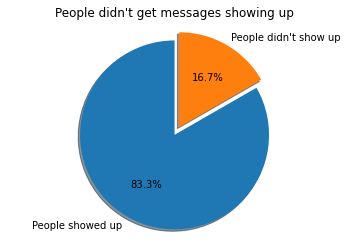

In [75]:
ppl_didnot_get_msg_related_data = data[data['SMS_received'] == 0].groupby('No-show')['SMS_received'].count().reset_index()
ppl_didnot_get_msg_and_showedup = (ppl_didnot_get_msg_related_data.at[0,'SMS_received'] / ppl_didnot_get_msg_related_data['SMS_received'].sum())*100
ppl_didnot_get_msg_and_didnot_showup = (ppl_didnot_get_msg_related_data.at[1,'SMS_received'] / ppl_didnot_get_msg_related_data['SMS_received'].sum())*100
labels = ["People showed up", "People didn't show up"]
sizes = [ppl_didnot_get_msg_and_showedup , ppl_didnot_get_msg_and_didnot_showup]
fig3,ax3 = plt.subplots()
ax3.pie(sizes,explode=(0,.1) , labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax3.axis('equal')
plt.title("People didn't get messages showing up")
plt.show()

### It turns that 83.3% of the people that didn't recieve a message showed up in their appointments, and based on this the message didn't have the great impact like i thought it would be.

# <font color=red>3-</font>

## <font color=red>Now let's see how the number of the days between tha scheduledDay and the appointmentDay affected on people's showing up`</font>

In [76]:
data.groupby('No-show')['difference_in_days'].describe()

,count,mean,std,min,25%,50%,75%,max
No-show,,,,,,,,
No,88208.0,8.754659,14.550398,0.0,0.0,2.0,12.0,179.0
Yes,22314.0,15.835484,16.605600,0.0,4.0,11.0,23.0,179.0


### It looks that the number of the waiting days has a significant effect on people's showing up,people that showed up to their appintment have waited 9 days nearly in average,but the people that didtn't show up nearly waited 16 days in average

# <font color=red>4-</font>

## <font color=red>Does the presence of the Scholarship affect on their situation or not ?</font>

In [77]:
data.groupby("No-show")['Scholarship'].describe()

,count,mean,std,min,25%,50%,75%,max
No-show,,,,,,,,
No,88208.0,0.093903,0.291695,0.0,0.0,0.0,0.0,1.0
Yes,22314.0,0.115533,0.319671,0.0,0.0,0.0,0.0,1.0


### As we can see here from the mean column, the presence of the people's scholarship didn't have a big effect on people's showing up

# <font color=red>5-</font>

## <font color=red> Now Let's see if the patients didn't show up due to handcaps or not </font>

In [78]:
data.groupby("No-show")['Handcap'].sum().reset_index()

,No-show,Handcap
0,No,1834
1,Yes,405


In [79]:
(data[data['No-show'] == "Yes"]['Handcap'].sum() / data.groupby('No-show')['Handcap'].sum().reset_index()['Handcap'].sum() ) *100

18.088432335864223

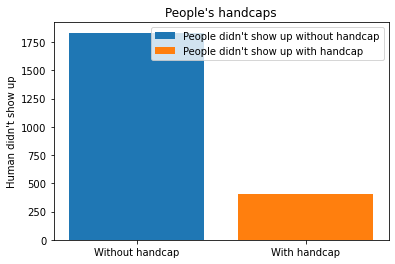

In [80]:
ppl_didnot_showup_without_handcap=(data.groupby('No-show')['Handcap'].sum().reset_index()['Handcap'].sum())-(data[data['No-show'] == "Yes"]['Handcap'].sum())
ppl_didnot_showup_with_handcap=(data[data['No-show'] == "Yes"]['Handcap'].sum())
plt.bar("Without handcap",ppl_didnot_showup_without_handcap,label="People didn't show up without handcap")
plt.bar("With handcap",ppl_didnot_showup_with_handcap,label="People didn't show up with handcap")
plt.ylabel("Human didn't show up")
plt.title("People's handcaps")
plt.legend()


### It looks that only 18.16% of the people that didn't show up to their appointments had handcaps this mean that the majority had no handcap and still didn't show up

## <font color=orange> Limitaion : </font>

### There are handcaps in the rows related to the people that already showed up in the appointments which doesn't make a sense.From what i see here there is handacaps related to the people that already showed up even more that the people that didn't show up which is sure completely wrong. it's either the handcaps got replaced with another column by mistake or the wrong values may be added by mistake.  Sure this will affect the answer of this question beacuse maybe these 1834 also didn't show up in their appintemnts and so the percent will rise. 

## <font color=red>Summary  </font>

### After assessing and cleaning the data i started the analysis to determine what caused the patients not to show up in their appointments, So i tried ti guess what are the factors that can be most likely affected on them and had a deep look into the data to answer these 5 questions :

#### 1-What is the percent of the people that didn't show up to their appointments ? 

#### 2-What is the influence of the SMS_received on the patient's showing up situation ?

#### 3-Is the period between the ScheduledDay & the appoinmentDay has any thing to do with their showing up or not ?

#### 4-Does the patient's Scholarship affected on their showing up situation ?

#### 5-Do the patients didn't show up because they had handcaps   ?

### After investigating the dataset and answering these questions i found that the most effective factor was the period that the people had to wait till the appointment Day. I found that if the patient that attended their appointments had to wait 9 days nearly in average while the patients that didn't show up had to wait 16 days in average.
### So my conclusion is that the patients don't prefer to wait too much and so the appointment day should be near to the day they schedule their appointment in. 

## <font color=orange> Limitaions : </font>

### While answering question  i  found that there are handcaps in the rows related to the people that already showed up in the appointments which doesn't make a sense.From what i see here there is handacaps related to the people that already showed up even more that the people that didn't show up which is sure completely wrong. it's either the handcaps got replaced with another column by mistake or the wrong values may be added by mistake.  Sure this will affect the answer of this question beacuse maybe these 1834 also didn't show up in their appintemnts and so the percent will rise much higher than 18.16%. Otherwise there were no null or unlogic values that can affect on the output conclusion so the previous limition was the only one.